In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df=pd.read_csv('/Users/avinashmagar/Documents/DataScience/python/Dataset/Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
df.shape

(6435, 8)

In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df= df.drop(['Date'], axis=1)

In [9]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

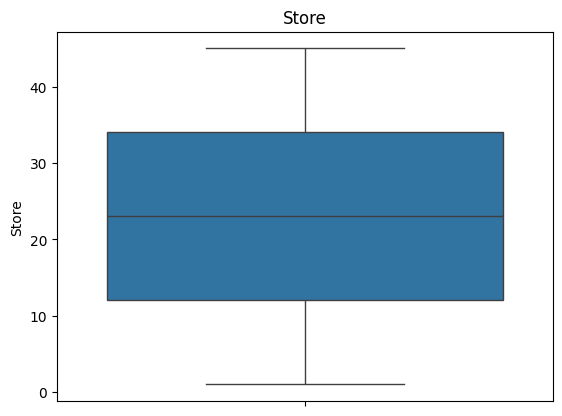

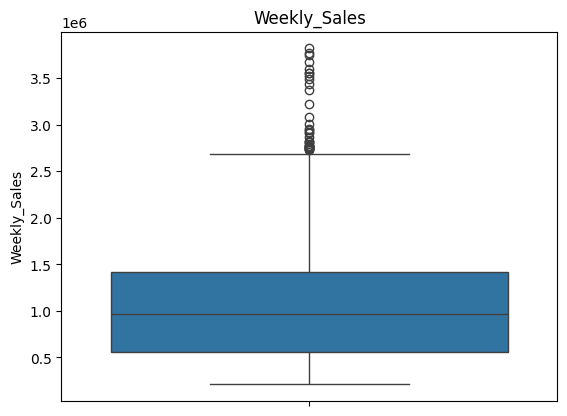

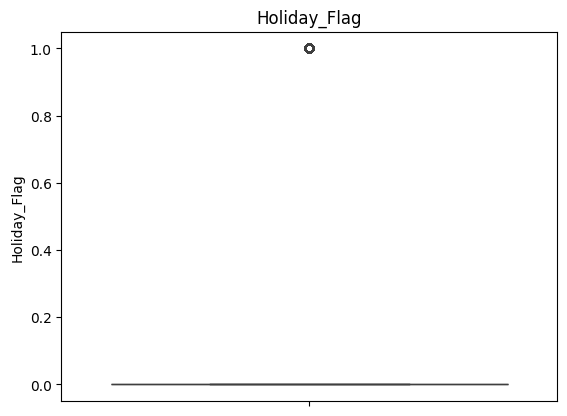

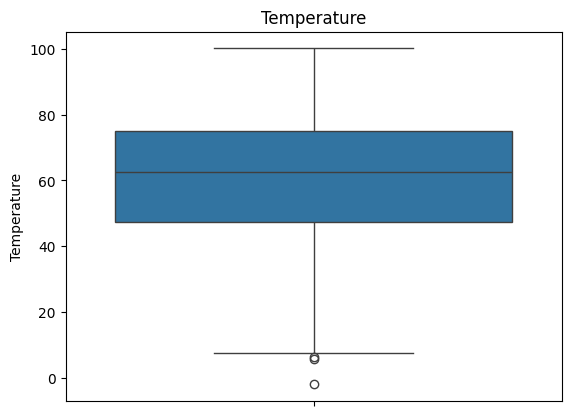

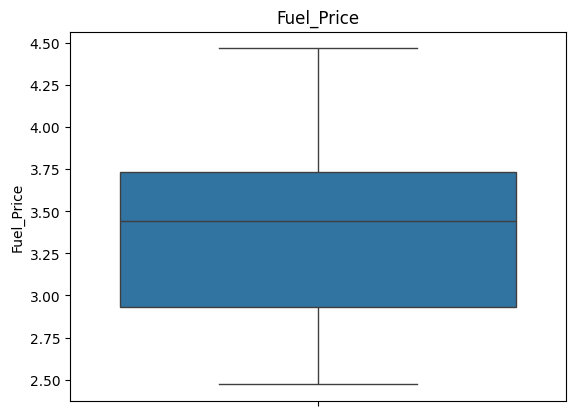

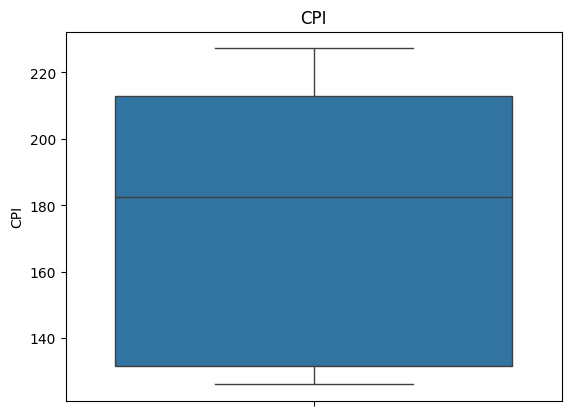

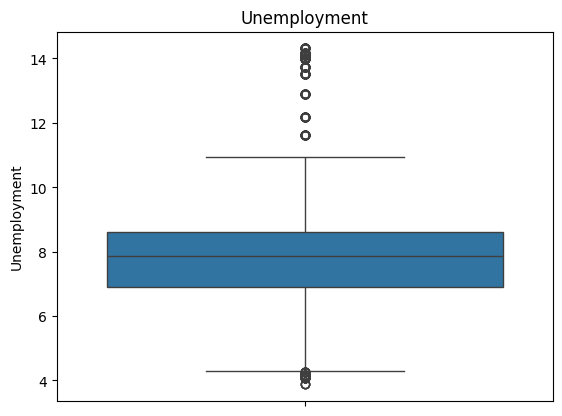

In [11]:
#cheking outliers at once
for i in df.select_dtypes(include=np.number).columns:
  plt.title(i)
  sns.boxplot(df[i])
  plt.show()

In [12]:
quantile1=df['Unemployment'].quantile(0.25)
quantile3=df['Unemployment'].quantile(0.75)
iqr=quantile3-quantile1
upperl=quantile3+1.5*iqr
lowerl=quantile1-1.5*iqr
df['Unemployment']=df['Unemployment'].clip(upperl,lowerl)
upperl,lowerl

(np.float64(11.218499999999999), np.float64(4.2945))

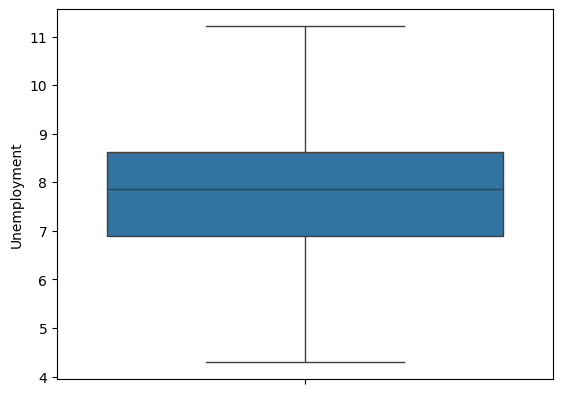

In [13]:
sns.boxplot(df['Unemployment'])
plt.show()

In [14]:
quantile1=df['Temperature'].quantile(0.25)
quantile3=df['Temperature'].quantile(0.75)
iqr=quantile3-quantile1
upperl=quantile3+1.5*iqr
lowerl=quantile1-1.5*iqr
df['Temperature']=df['Temperature'].clip(upperl,lowerl)
upperl,lowerl

(np.float64(116.16), np.float64(6.240000000000002))

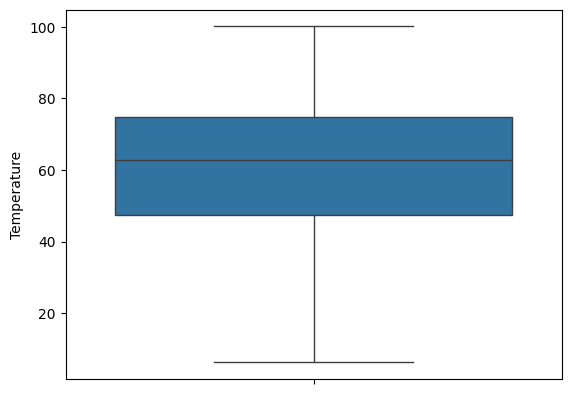

In [15]:
sns.boxplot(df['Temperature'])
plt.show()

In [16]:
quantile1=df['Holiday_Flag'].quantile(0.25)
quantile3=df['Holiday_Flag'].quantile(0.75)
iqr=quantile3-quantile1
upperl=quantile3+1.5*iqr
lowerl=quantile1-1.5*iqr
df['Holiday_Flag']=df['Holiday_Flag'].clip(upperl,lowerl)
upperl,lowerl

(np.float64(0.0), np.float64(0.0))

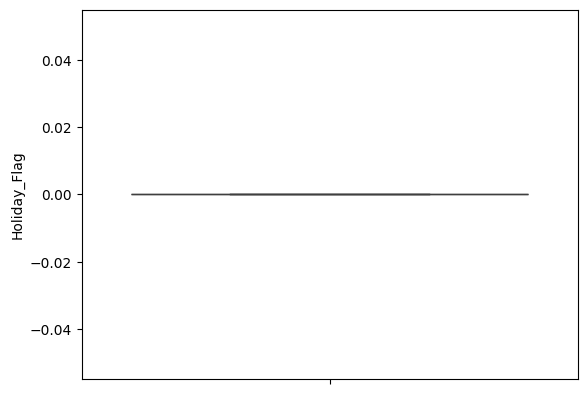

In [17]:
sns.boxplot(df['Holiday_Flag'])
plt.show()

In [18]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply standard scaling to numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the scaled dataset
print(df.head())

      Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
0 -1.693979      1.057420           0.0    -0.995450   -1.713800  1.004175   
1 -1.693979      1.054348           0.0    -1.201534   -1.766089  1.007880   
2 -1.693979      1.001206           0.0    -1.124524   -1.840166  1.009074   
3 -1.693979      0.642828           0.0    -0.761165   -1.737766  1.009849   
4 -1.693979      0.899914           0.0    -0.768215   -1.598328  1.010624   

   Unemployment  
0       0.15441  
1       0.15441  
2       0.15441  
3       0.15441  
4       0.15441  


In [19]:
from sklearn.model_selection import train_test_split
x=df.drop('Weekly_Sales', axis=1)
y=df['Weekly_Sales']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state= 42)
print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (5148, 6) (5148,)
Test set: (1287, 6) (1287,)


In [30]:
import xgboost as xgb
xgbr=xgb.XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
xgbr.fit(x_train,y_train)
y_pred_xgbr=xgbr.predict(x_test)
print("XGBoost RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

XGBoost RMSE: 0.333441269066393


In [33]:
summary=pd.DataFrame({
    'Actual species':y_test,
    'XGBoost Regression':y_pred_xgbr,   
})
print('\nPrediction Summary\n')
print(summary.head())


Prediction Summary

      Actual species  XGBoost Regression
2436        0.162736            0.108332
3361        0.456983            0.398968
233         1.279997            1.415609
3667        0.054358            0.088616
5011       -1.095318           -0.919883


In [41]:
df["Id"] = range(1, len(df) + 1) 

In [49]:
submission=df[["Id", "Weekly_Sales"]].to_csv("submission.csv", index=False)
submission 
df[["Id", "Weekly_Sales"]].to_csv("submission.csv", index=False)

print("Submission file created successfully!")

# Read and display the saved submission file in table format
submission = pd.read_csv("submission.csv") # Save the submission file
submission.head()  # Shows the first few rows of the submission file

Submission file created successfully!


,Id,Weekly_Sales
0,1,1.057420
1,2,1.054348
2,3,1.001206
3,4,0.642828
4,5,0.899914
